## Pattern Completion Results

In [45]:
import math
import pandas as pd
import pingouin as pg
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [46]:
figurepath = 'C:/Users/tuq67942/OneDrive - Temple University/Documents/Figures/'
dependencydf = pd.read_csv('csvs/Dependency_Year_1.csv')
pairaccuracydf = pd.read_csv('csvs/PC_pairs.csv')
PCoutputdf = pd.read_csv('csvs/PC_outputdf.csv')
PCconddf = pd.read_csv('csvs/PC_outputconddf.csv')
PCoutputplotdf = pd.read_csv('csvs/PC_outputplotdf.csv')

## Does delay matter for accuracy? Yes!
## Does delay matter for dependency? No!

In [47]:
from pingouin import ttest
for res in ['Accuracy','Dependency']:
    print(res+' difference with people with near-perfect accuracy:')  
    display(ttest(dependencydf[dependencydf['Delay']==True][res],
                  dependencydf[dependencydf['Delay']==False][res]))
    print(res+' difference without them:')
    display(ttest(dependencydf.loc[(dependencydf['Delay']==True) 
                                   & (dependencydf['Accuracy']<0.95)][res],
                  dependencydf.loc[(dependencydf['Delay']==False) 
                                   & (dependencydf['Accuracy']<0.95)][res]))

Accuracy difference with people with near-perfect accuracy:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-10.592655,84.705057,two-sided,3.459216e-17,"[-0.46, -0.32]",2.271798,1.147e+14,1.0


Accuracy difference without them:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.437251,64.705486,two-sided,5.053843e-12,"[-0.42, -0.26]",1.968868,2.97e+09,1.0


Dependency difference with people with near-perfect accuracy:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.57587,82.768597,two-sided,0.566266,"[-0.01, 0.01]",0.122556,0.259,0.087271


Dependency difference without them:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.401389,71.366437,two-sided,0.689333,"[-0.01, 0.01]",0.090512,0.258,0.066947


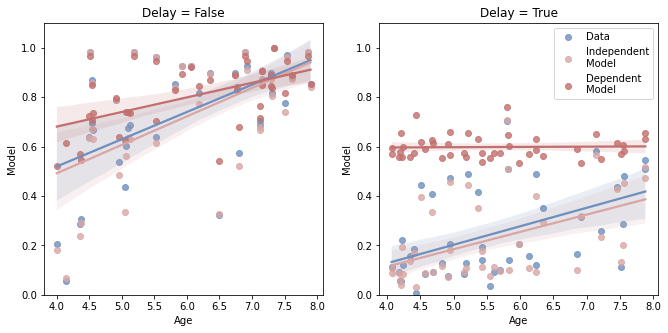

,Delay,Variable,r,p,N
0,False,Data,0.568430,0.000086,42
1,False,Independent\nModel,0.570432,0.000080,42
2,False,Dependent\nModel,0.545791,0.000185,42
3,True,Data,0.485233,0.000729,45
4,True,Independent\nModel,0.479077,0.000870,45
5,True,Dependent\nModel,0.027516,0.857607,45


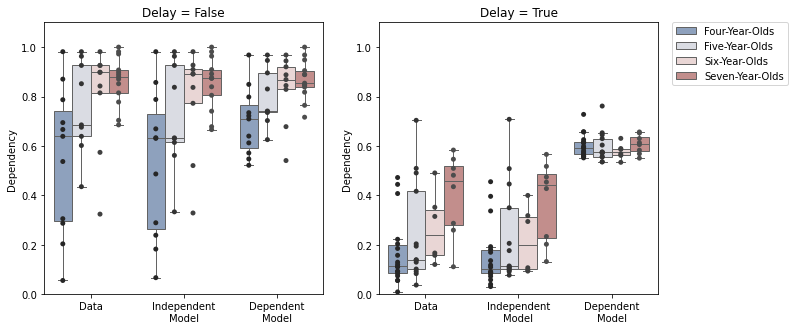

In [48]:
palette=['#6e90bf',  '#d9a6a4', '#c26f6d']
order = ["Four-Year-Olds","Five-Year-Olds","Six-Year-Olds","Seven-Year-Olds"]
tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains('Data|Independent Model|Dependent Model')].copy()
tmp['Model-type'] = tmp['Model-type'].replace({'Independent Model': 'Independent\nModel',
                                               'Dependent Model': 'Dependent\nModel'})
def numbers_to_words (number):
    number2word = {'4': "Four-Year-Olds", '5': "Five-Year-Olds", '6': "Six-Year-Olds",
            '7': "Seven-Year-Olds", '8': "Eight-Year-Olds", '9': "Nine-Year-Olds"}
    return " ".join(map(lambda i: number2word[i], str(number)))
statlist = []
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
for i,delay in enumerate([False,True]):
    tmp_ = tmp[tmp.Delay == delay]
    for c,model in enumerate(tmp['Model-type'].unique()):
        tmpdf = tmp_[tmp_['Model-type'].str.contains(model)].copy()
        tmpdf = tmpdf.rename(columns={'Dependency': model})
        stat_vals = stats.pearsonr(tmpdf['Age'],tmpdf[model])
        statlist.append({'Delay':delay,'Variable':model, 'r':stat_vals[0], 'p':stat_vals[1], 'N':len(tmpdf)})
        g = sns.regplot(data=tmpdf, x="Age", y=model, ax=axes[i], color=palette[c], label=model)
        axes[i].set(ylim=(0, 1.1))
        axes[i].set_title('Delay = '+str(delay))
        axes[i].set_ylabel('Model')
plt.legend(fontsize=10)
plt.show()
statdf=pd.DataFrame(statlist)
display(statdf)
tmp['Age'] = tmp['Age'].map(lambda age: numbers_to_words(math.floor(age)))
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
for i,delay in enumerate([False,True]):
    tmp_ = tmp[tmp.Delay == delay]
    sns.boxplot(data=tmp_, x="Model-type", y="Dependency", hue="Age", palette="vlag",ax=axes[i],
                hue_order=order, showfliers = False)
    sns.stripplot(data=tmp_, x="Model-type", y="Dependency", hue="Age", dodge=True,palette='dark:.3',
                  hue_order=order, jitter=False,legend=False,ax=axes[i])
    axes[i].set(ylim=(0, 1.1))
    axes[i].set_title('Delay = '+str(delay))
    axes[i].set(xlabel=None)
    
i = axes[0].legend().remove()
i = axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Accuracy increases with age
## Dependency is stable across age

,Delay,Variable,r,p,N
0,False,Accuracy,0.567232,0.000090,42
1,True,Accuracy,0.524364,0.000155,47
2,False,Dependency,-0.260895,0.095155,42
3,True,Dependency,-0.155137,0.297762,47


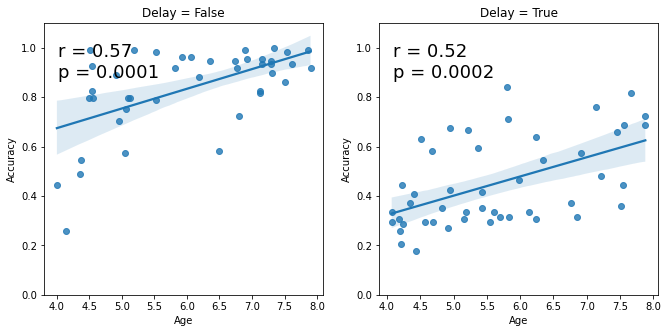

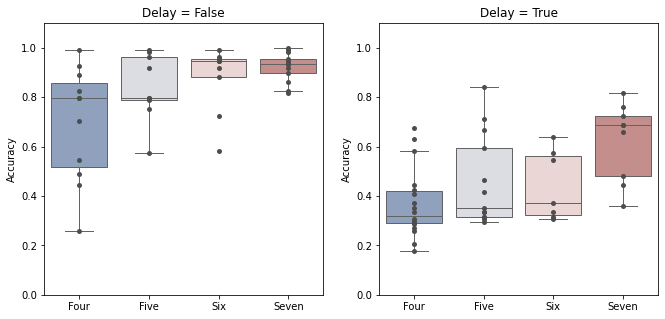

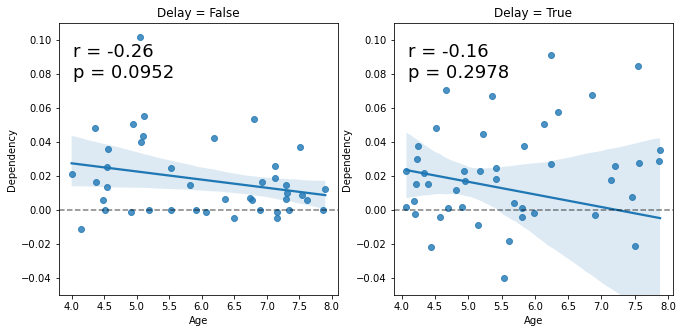

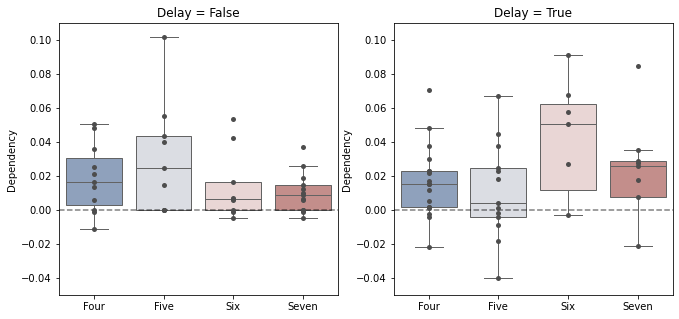

In [43]:
pal = sns.color_palette("vlag",4)
palette = sns.color_palette([pal.as_hex()[0],pal.as_hex()[1],pal.as_hex()[2],pal.as_hex()[3]])
order = ["Four","Five","Six","Seven"]
statlist = []
def numbers_to_words (number):
    number2word = {'4': "Four", '5': "Five", '6': "Six",
            '7': "Seven", '8': "Eight", '9': "Nine"}
    return " ".join(map(lambda i: number2word[i], str(number)))
for res in ['Accuracy','Dependency']:
    tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains(res)].copy()
    if 'A' in res: tmp = tmp.rename(columns={'Dependency': 'Accuracy'})
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    for i,delay in enumerate([False,True]):
        tmp_ = tmp[tmp.Delay == delay]
        stat_vals = stats.pearsonr(tmp_['Age'],tmp_[res])
        statlist.append({'Delay':delay,'Variable':res, 'r':stat_vals[0], 'p':stat_vals[1], 'N':len(tmp_)})
        g = sns.regplot(data=tmp_, x="Age", y=res, ax=axes[i])
        axes[i].text(0.05, 0.8, f'r = {stat_vals[0]:.2f}\np = {stat_vals[1]:.4f}', transform=axes[i].transAxes, size=18)
        axes[i].set(ylim=(0, 1.1)) if 'A' in res else axes[i].set(ylim=(-0.05, 0.11))
        axes[i].set_title('Delay = '+str(delay))
        if 'D' in res: axes[i].axhline(y=0.0, color='k', linestyle='--',alpha=0.5)
    tmp['Age'] = tmp['Age'].map(lambda age: numbers_to_words(math.floor(age)))
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    for i,delay in enumerate([False,True]):
        tmp_ = tmp[tmp.Delay == delay]
        sns.boxplot(data=tmp_, x="Age", y=res, hue="Age", ax=axes[i],palette=palette,
                    hue_order=order, order=order, showfliers = False)
        sns.stripplot(data=tmp_, x="Age", y=res, dodge=True,color='.3',
                      order=order, jitter=False,ax=axes[i])
        axes[i].set(ylim=(0, 1.1)) if 'A' in res else axes[i].set(ylim=(-0.05, 0.11))
        axes[i].set_title('Delay = '+str(delay))
        axes[i].set(xlabel=None)
        if 'D' in res: axes[i].axhline(y=0.0, color='k', linestyle='--',alpha=0.5)
statdf=pd.DataFrame(statlist)
display(statdf)

## Accuracy broken down by pair-type (6 pairs)
## Run ANOVA/t-tests to see if any pair has better accuracy

For subjects with delay = True


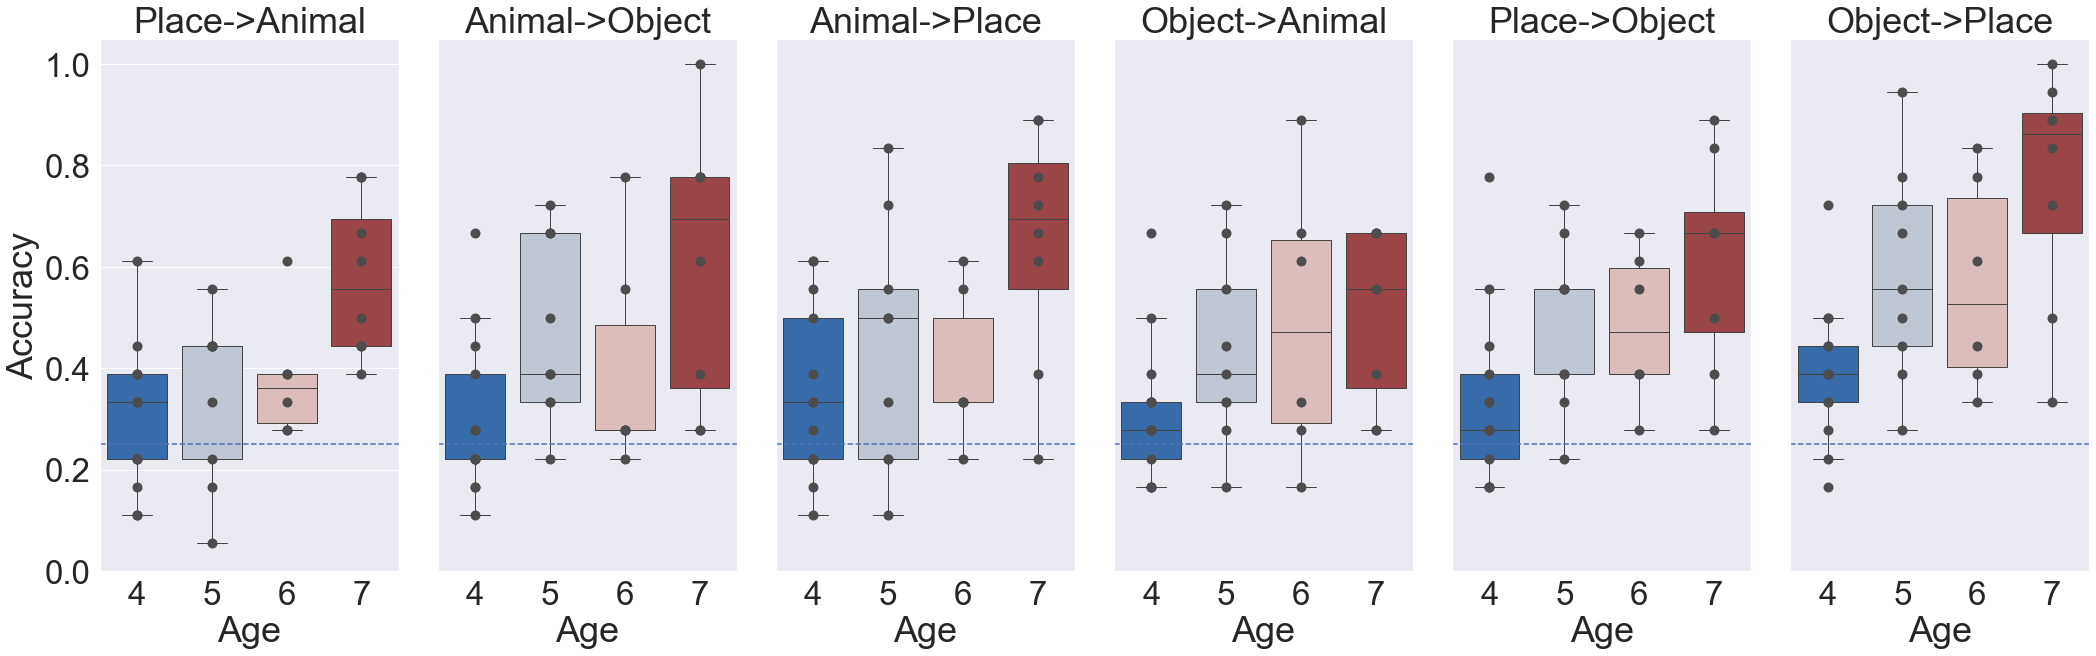

               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
Pair  7.6839 5.0000 175.0000 0.0000

For subjects with delay = False


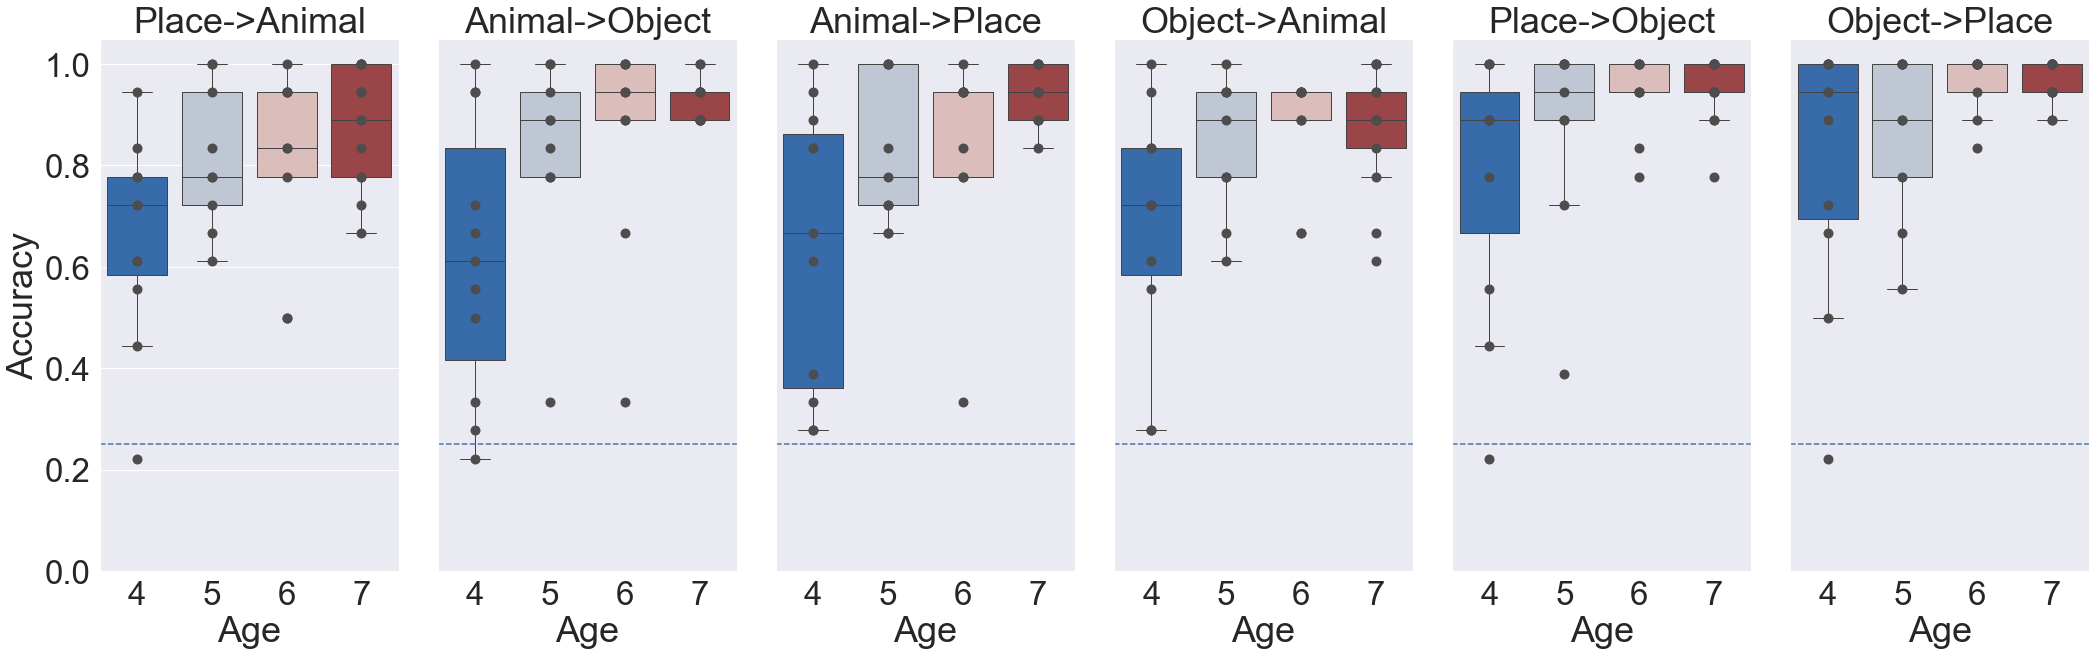

               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
Pair  9.9674 5.0000 205.0000 0.0000



In [34]:
from statsmodels.stats.anova import AnovaRM
PCcols = ['Ab', 'Bc', 'Ba', 'Cb', 'Ac', 'Ca']
ABC = {'A':'Place','B':'Animal','C':'Object'}
ordertmp = [4,5,6,7]
sns.set(font_scale=3)
for delay in [True,False]:
    print('For subjects with delay = '+str(delay))
    tmp = pairaccuracydf[pairaccuracydf['Delay'] == delay].copy()
    tmp['Age'] = tmp['Age'].map(lambda age: math.floor(age))
    fig = plt.figure(figsize=(30,10))
    for i,pair in enumerate(PCcols):
        pairstring = ABC[pair[0]]+'->'+ABC[pair[1].upper()]
        ax = plt.subplot(1,6, i+1)
        tempdf = tmp.loc[tmp['Pair'] == pairstring]
        sns.boxplot(data=tempdf, x="Age", y="Accuracy", hue='Age',
                    palette="vlag",order=ordertmp,hue_order=ordertmp,
                    showfliers = False,legend=False)
        sns.stripplot(data=tempdf, x="Age", y="Accuracy", dodge=True,
                      color=".3",order=ordertmp,s=10,jitter=False)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        plt.title(pairstring)
        plt.axhline(y=0.25, color='b', linestyle='--')
        ax.set(ylim=(0,1.05))
        if i>0:
            ax.yaxis.set_visible(False)
    fig.tight_layout()
    plt.show()
    print(AnovaRM(data=tmp, depvar='Accuracy',
              subject='Subject', within=['Pair']).fit())

## Does Cue-type impact accuracy?

In [35]:

for delay in [True,False]:
    print('For subjects with delay = '+str(delay))
    tmp = pairaccuracydf[pairaccuracydf['Delay'] == delay].copy()
    res = pg.rm_anova(dv='Accuracy',within='Cue',subject='Subject',
                      data=tmp)
    post_hocs = pg.pairwise_tests(dv='Accuracy',within='Cue',
                                  subject='Subject',padjust='bonf',
                                  data=tmp)
    display(res)
    display(post_hocs)

For subjects with delay = True


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Cue,2,70,5.535989,0.005861,0.019431,0.987099


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Cue,Animal,Object,True,True,-2.313957,35.0,two-sided,0.026663,0.079988,bonf,1.859,-0.228905
1,Cue,Animal,Place,True,True,0.757924,35.0,two-sided,0.453570,1.000000,bonf,0.234,0.077942
2,Cue,Object,Place,True,True,3.350663,35.0,two-sided,0.001943,0.005829,bonf,17.51,0.341475


For subjects with delay = False


,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Cue,2,82,4.863777,0.01009,0.01686,0.011898,0.783733,False,0.724055,0.001568


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Cue,Animal,Object,True,True,-2.893183,41.0,two-sided,0.006081,0.018243,bonf,6.147,-0.252451
1,Cue,Animal,Place,True,True,-1.552986,41.0,two-sided,0.128112,0.384337,bonf,0.505,-0.144509
2,Cue,Object,Place,True,True,1.850480,41.0,two-sided,0.071459,0.214377,bonf,0.79,0.121591


## Does item-to-be retrieved impact accuracy?

In [36]:
for delay in [True,False]:
    print('For subjects with delay = '+str(delay))
    tmp = pairaccuracydf[pairaccuracydf['Delay'] == delay].copy()
    res = pg.rm_anova(dv='Accuracy',within='To-be-retrieved',subject='Subject',
                      data=tmp)
    post_hocs = pg.pairwise_tests(dv='Accuracy',within='To-be-retrieved',
                                  subject='Subject',padjust='bonf',
                                  data=tmp)
    display(res)
    display(post_hocs)

For subjects with delay = True


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,To-be-retrieved,2,70,9.240251,0.000275,0.042568,0.933941


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,To-be-retrieved,Animal,Object,True,True,-1.724461,35.0,two-sided,0.093447,0.280342,bonf,0.683,-0.229571
1,To-be-retrieved,Animal,Place,True,True,-4.038036,35.0,two-sided,0.000280,0.000839,bonf,98.424,-0.508980
2,To-be-retrieved,Object,Place,True,True,-2.851973,35.0,two-sided,0.007243,0.021730,bonf,5.575,-0.267821


For subjects with delay = False


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,To-be-retrieved,2,82,8.384431,0.000486,0.017242,0.991552


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,To-be-retrieved,Animal,Object,True,True,-3.019375,41.0,two-sided,0.004344,0.013033,bonf,8.233,-0.238726
1,To-be-retrieved,Animal,Place,True,True,-3.777872,41.0,two-sided,0.000504,0.001511,bonf,55.584,-0.309222
2,To-be-retrieved,Object,Place,True,True,-0.843924,41.0,two-sided,0.403609,1.000000,bonf,0.233,-0.060740
